In [1]:
#import mss
from mss import visreader as mvis
from mss import mssmain as msm
from mss import align
from mss import frag
from mss import dm
import pandas as pd

/home/hack_summer/miniconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22.2.post1 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/hack_summer/miniconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.22.2.post1 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


# Peak extraction
## Single file
Alignment of different smaples could be conducted with align.mss_align function

In [25]:
#Import mzml file
path = '/mnt/d/UW/mzml/AC_Neg.mzML'
scans = msm.get_scans(path, ms_all=True)
#noise removal
msm.noise_removal(scans, 5000)
#Generate peak list
msm.peak_list(scans[:500], 10, enable_score=True,peak_base=0.001,peak_area_thres=0)

Generating mz list...
Finding peaks...
Peak processing finished!
Dataframe created!


m/z    rt      sn  score     peak area
0     57.0339  1.14   1.787      2  3.872643e+04
1     57.0345  1.14   1.854      2  4.554036e+04
2     57.0350  1.14   1.963      2  4.439188e+04
3     59.0129  1.14  12.579      2  1.282145e+05
4     59.0135  1.11   1.909      2  1.848876e+05
..        ...   ...     ...    ...           ...
303  322.8400  1.40   3.701      3  4.505326e+05
304  322.8432  1.40   1.633      3  1.303910e+06
305  322.8465  1.40   1.933      3  1.855922e+06
306  322.8497  1.40   1.933      3  1.855922e+06
307  322.8529  1.40   2.282      3  1.324318e+06

[308 rows x 5 columns]

In [31]:
#Import mzml file
path = '../example_data/ex_1.mzML'
scans = msm.get_scans(path, ms_all=True)
#noise removal
msm.noise_removal(scans, 5000)
#Generate peak list
msm.peak_list(scans[:500], 10, enable_score=False,peak_base=0.001,peak_area_thres=0)

Generating mz list...
Finding peaks...
Peak processing finished!
Dataframe created!


m/z    rt      sn  score     peak area
0     100.1127  2.47  10.450      1  1.691418e+05
1     104.1078  0.68   0.000      1  2.637985e+04
2     104.9923  0.64   0.000      1  8.390570e+06
3     104.9933  0.64  69.370      1  8.168138e+06
4     105.9955  0.63   0.000      1  1.388078e+05
..         ...   ...     ...    ...           ...
264   923.0153  1.38  13.176      1  2.618347e+06
265   923.0153  1.86  15.289      1  2.617588e+06
266   925.0204  0.64   0.000      1  3.568724e+04
267   994.9927  0.65   0.000      1  4.122322e+04
268  1001.0106  0.63   0.000      1  5.651240e+04

[269 rows x 5 columns]

* Complete function configurations (access with shift+tab):
~~~
msm.peak_list(
    mzml_scans,
    err_ppm=10,
    enable_score=True,
    mz_c_thres=5,
    peak_base=0.001,
    peakutils_thres=0.1,
    min_d=1,
    rt_window=1.5,
    peak_area_thres=100000.0,
    min_scan=5,
    max_scan=200,
    max_peak=5,
    overlap_tol=15, 
    sn_detect=15, 
    rt=None)
~~~

## mss_process: from mzml to aligned peak list

In [4]:
align.mss_process('../example_data/', '../example_data/example_case/aligned_peak_list_t.csv', thres_noise=100000,enable_score=False)

Reading files...


100%|█████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:09<00:00,  2.45s/it]


['example.mzML', 'ex_1.mzML', 'ex_2.mzML', 'ex_3.mzML']
Batch read finished!
Processing peak list...
Processing 1 out of  4 file
Generating mz list...
Finding peaks...
Peak processing finished!
Dataframe created!
Processing 2 out of  4 file
Generating mz list...
Finding peaks...
Peak processing finished!
Dataframe created!
Processing 3 out of  4 file
Generating mz list...
Finding peaks...
Peak processing finished!
Dataframe created!
Processing 4 out of  4 file
Generating mz list...
Finding peaks...
Peak processing finished!
Dataframe created!
Process completed!
Alignment beginning..


100%|████████████████████████████████████████████████████████████████████████████████| 868/868 [00:00<00:00, 957.55it/s]


Alignment done!
Result saved to ../example_data/example_case/aligned_peak_list_t.csv
Finished!


Average m/z  Average rt  Average sn  Average score       example  \
0      102.01420       0.450       2.054            1.0  379178.34375   
1      104.99327       0.637    5000.000            1.0       0.00000   
2      113.96500      21.180    5000.000            1.0  580375.25000   
3      121.05090       0.790    5000.000            1.0  404855.34375   
4      121.05090       5.950       2.082            1.0  373235.00000   
..           ...         ...         ...            ...           ...   
207    723.51888      19.207    5000.000            1.0       0.00000   
208    727.60384      15.550    5000.000            1.0       0.00000   
209    728.60864      15.553    5000.000            1.0       0.00000   
210    783.66870      16.483    5000.000            1.0       0.00000   
211   1342.93677      19.205    5000.000            1.0       0.00000   

             ex_1          ex_2          ex_3  
0    0.000000e+00  0.000000e+00  0.000000e+00  
1    7.830790e+06  7.705347e+06  7.648624e+06  
2    0.000000e+00  0.000000e+00  0.000000e+00  
3    0.000000e+00  0.000000e+00  0.000000e+00  
4    0.000000e+00  0.000000e+00  0.000000e+00  
..            ...           ...           ...  
207  1.499962e+07  1.490802e+07  1.491226e+07  
208  7.301074e+06  7.171254e+06  4.369608e+06  
209  1.527725e+06  1.429946e+06  1.409153e+06  
210  4.111448e+06  3.975550e+06  4.019351e+06  
211  0.000000e+00  6.168859e+05  7.739580e+05  

[212 rows x 8 columns]

In [5]:
# Batch reading for mzml files
batch_scan, file_list = msm.batch_scans('../example_data/')
# Quick peak screening/integration through different files
d_result = msm.batch_peak(batch_scan, file_list, 283.1816, 50)
d_result

100%|█████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:06<00:00,  1.63s/it]


['example.mzML', 'ex_1.mzML', 'ex_2.mzML', 'ex_3.mzML']
Batch read finished!


rt_max  rt_start  rt_end     peak_area        source
0    8.45      8.35    8.77  8.528269e+06  example.mzML
1    8.48      8.38    9.14  1.295261e+08     ex_1.mzML
2    8.48      8.37    9.10  1.284578e+08     ex_2.mzML
3    8.48      8.38    9.06  1.293620e+08     ex_3.mzML

# Data inspection/visualization module

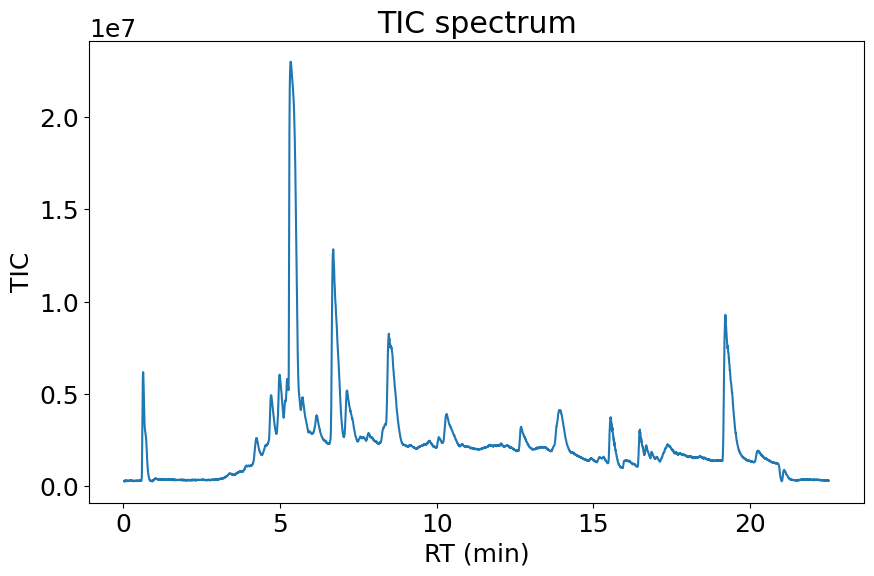

In [32]:
mvis.tic_plot(scans, interactive=False, f_width=10, f_height=6)

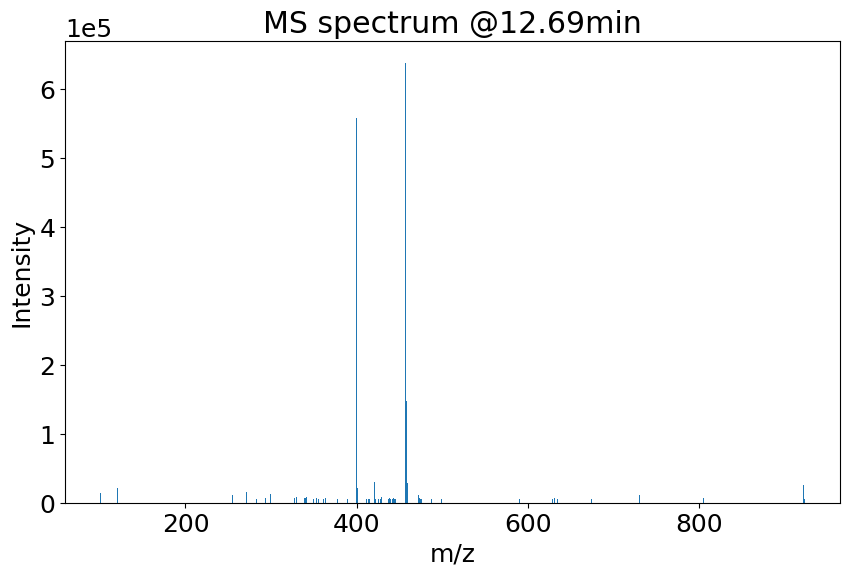

In [33]:
mvis.ms_spectrum(scans,time=12.69,interactive=False,f_width=10,f_height=6)

In [35]:
mvis.ms_chromatogram(
    scans,
    input_value=399.2523, # Chemical formula, m/z value both works
    error=10, # ppm
    fillgap=False,
    mode='pos',
    interactive=True,
    f_width=10,
    f_height=6,
)

#Coupled with integration plot or chromatogram plot
mvis.manual_integration(scans,input_mz=399.2523,error=10,start=12,end=14)

17930282.455729164

Peak retention time: 12.69 minute, Peak area:  19449229.1
Peak retention time: 16.85 minute, Peak area:  5130730.1
Peak retention time: 16.68 minute, Peak area:  4503829.8


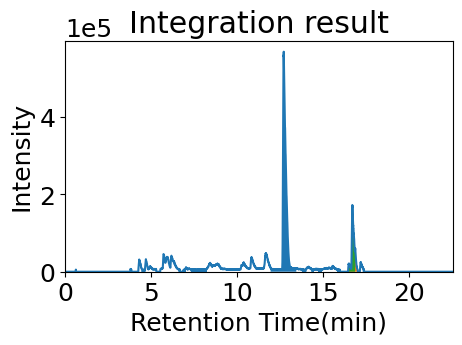

In [38]:
mvis.integration_plot(scans, 399.2523, 10000,f_width=5, f_height=3)

In [10]:
import pandas as pd
#Overview of the imported mzml file
mvis.overview_scatter(pd.read_csv('../example_data/example.csv'))

    'data': [{'marker': {'opacity': 0.5},
              'mode': 'markers…

# DM module

## Data clean up

In [41]:
d_ms = pd.read_csv('../example_data/example.csv')
# Data cleaning -- blank removal, RSD check, retains features that meaningful for subsequent analysis
keys=['solvent','MeOH','ISTD'] # User select key strings in the data label from the blank samples
d_sample = dm.data_prep(d_ms,
                        keys,
                        simp_summary=False, #Optional average of replicates/CV calculation
                        svb_thres=10,
                        empty_thres=0,
                        rt_range=[2, 20],
                        mz_range=[200, 800],
                        sn_thres=3,
                        score_thres=0,
                        area_thres=100000)
d_sample.head()

100%|█████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.85it/s]


Average m/z  Average rt   Average sn  Average score    15min_1     15min_2  \
0    200.07184       6.269     3.636500              1   54678.79   44141.285   
1    200.07265       5.725     4.134429              1  105930.68  140324.440   
2    200.07127       4.848     9.874761              1   82868.14   94710.190   
4    200.08714       6.929  1267.909200              1  160914.33  221140.950   
6    200.09070      15.155     3.137500              1   68103.08   14056.476   

      15min_3       1h_1        1h_2       1h_3  ...     30min_3       4h_1  \
0  189940.880       0.00       0.000       0.00  ...  213060.250  103286.32   
1   61354.580   83699.19  126018.664  177297.27  ...   66302.630  114740.90   
2   55623.477   96109.65   97315.620  219414.34  ...   68374.000   77777.61   
4  161338.190  241858.56  299966.000  167917.83  ...  265436.400  134293.90   
6   82632.920       0.00       0.000       0.00  ...   48652.836       0.00   

         4h_2        4h_3       6h_1       6h_2       6h_3        T0_1  \
0  165942.900   33359.500       0.00       0.00       0.00   90425.980   
1   51638.850  136146.900  136208.42  189548.08   53266.54  132835.640   
2  113548.734   45313.880   66196.08  165290.81   65243.24   87390.910   
4  244612.170  120147.016  323141.30  399560.30  353856.72       0.000   
6       0.000       0.000       0.00       0.00       0.00   85220.555   

         T0_2       T0_3  
0  116799.050  196114.53  
1   86328.875  462870.53  
2   63871.380  369021.53  
4       0.000       0.00  
6   92658.410  109355.42  

[5 rows x 25 columns]

# Statistical analysis module

In [12]:
d_sample = pd.read_csv('../example_data/example_pca.csv') #DEMO data, pre-treated from dataframe above
d_sample.head()

Average m/z  Average rt  Average sn     Sample-T0  Sample-15min  \
0    100.01391      19.315    2.914223  271567.82000   253389.6700   
1    100.01397      17.723    3.860174  181919.32670   238582.4100   
2    100.01401      18.572    3.625520  397183.29000   109388.2187   
3    100.01402      16.828    3.433640  138308.93670   128661.4357   
4    100.01432      20.100    2.911555   55115.61667   113631.0320   

   Sample-30min    Sample-1h   Sample-2.5h     Sample-4h     Sample-6h  
0   253964.0533  210381.5000   11694.94533   43703.81500   33347.28667  
1   368346.7867  260821.8600  321300.57330  107147.37970  217524.70330  
2   507371.0600  116942.4220  291988.43670   82991.91667   90705.08867  
3   273132.1800  176959.1033   81405.48667  199444.50330  328527.69330  
4   125013.8523  142348.9847  246281.71670  175741.56000  133732.59670

## PCA

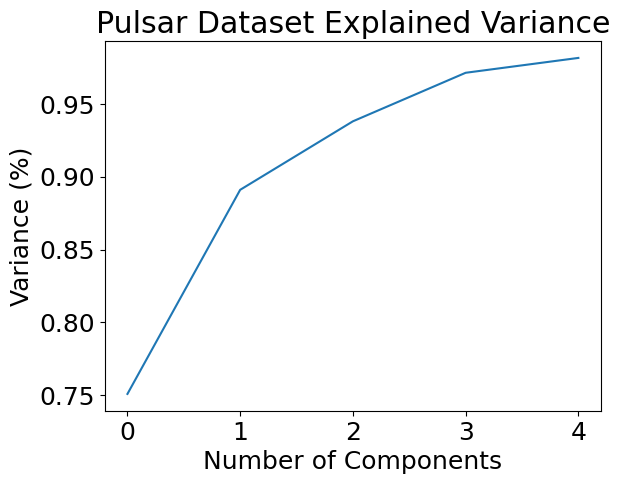

explained ratio: [0.7508293  0.14016222 0.04704567 0.03332346 0.01020514]


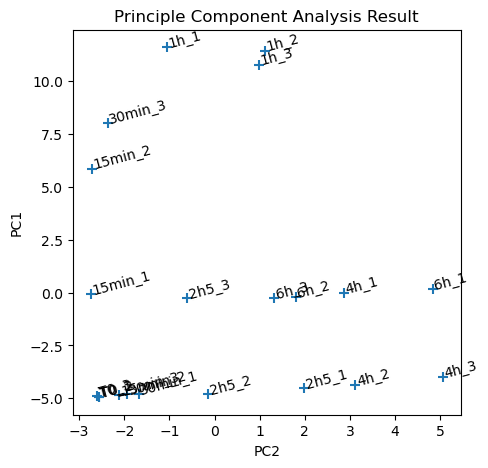

In [44]:
#PCA loading plot
import matplotlib as plt
font = {'family' : 'arial',
        'size'   : 18}

plt.rc('font', **font)
df = dm.PCA_report(d_sample.iloc[:,4:],figsize = (5,5))

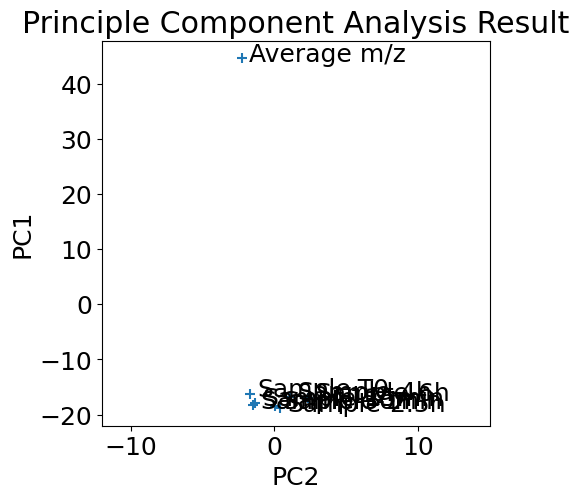

In [14]:
import matplotlib
import matplotlib.pyplot as plt
font = {'family' : 'arial',
        'size'   : 18}

matplotlib.rc('font', **font)
principle_1 = df.loc[:, 'principal component 1']
principle_2 = df.loc[:, 'principal component 2']
n = list(df.label)

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(principle_2, principle_1, s=50, marker='+')
plt.xlabel('PC2')
plt.ylabel('PC1')
plt.title('Principle Component Analysis Result')

for i, txt in enumerate(n):
    ax.annotate(txt, (principle_2[i]+0.5, principle_1[i]-0.5), rotation=0)

plt.xlim(-12,15)
plt.show()


## Clustering analysis based on DBSCAN

In [45]:
d_sample.head()

Average m/z  Average rt   Average sn  Average score    15min_1     15min_2  \
0    200.07184       6.269     3.636500              1   54678.79   44141.285   
1    200.07265       5.725     4.134429              1  105930.68  140324.440   
2    200.07127       4.848     9.874761              1   82868.14   94710.190   
4    200.08714       6.929  1267.909200              1  160914.33  221140.950   
6    200.09070      15.155     3.137500              1   68103.08   14056.476   

      15min_3       1h_1        1h_2       1h_3  ...     30min_3       4h_1  \
0  189940.880       0.00       0.000       0.00  ...  213060.250  103286.32   
1   61354.580   83699.19  126018.664  177297.27  ...   66302.630  114740.90   
2   55623.477   96109.65   97315.620  219414.34  ...   68374.000   77777.61   
4  161338.190  241858.56  299966.000  167917.83  ...  265436.400  134293.90   
6   82632.920       0.00       0.000       0.00  ...   48652.836       0.00   

         4h_2        4h_3       6h_1       6h_2       6h_3        T0_1  \
0  165942.900   33359.500       0.00       0.00       0.00   90425.980   
1   51638.850  136146.900  136208.42  189548.08   53266.54  132835.640   
2  113548.734   45313.880   66196.08  165290.81   65243.24   87390.910   
4  244612.170  120147.016  323141.30  399560.30  353856.72       0.000   
6       0.000       0.000       0.00       0.00       0.00   85220.555   

         T0_2       T0_3  
0  116799.050  196114.53  
1   86328.875  462870.53  
2   63871.380  369021.53  
4       0.000       0.00  
6   92658.410  109355.42  

[5 rows x 25 columns]

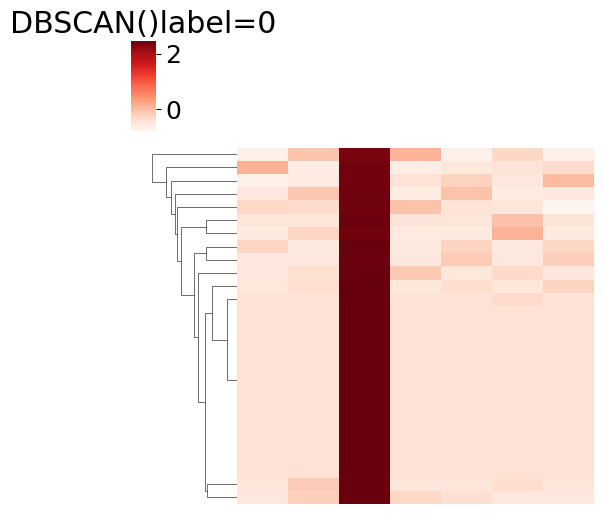

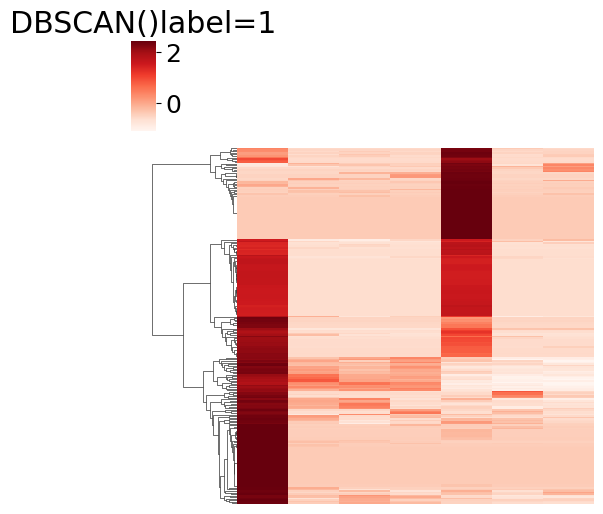

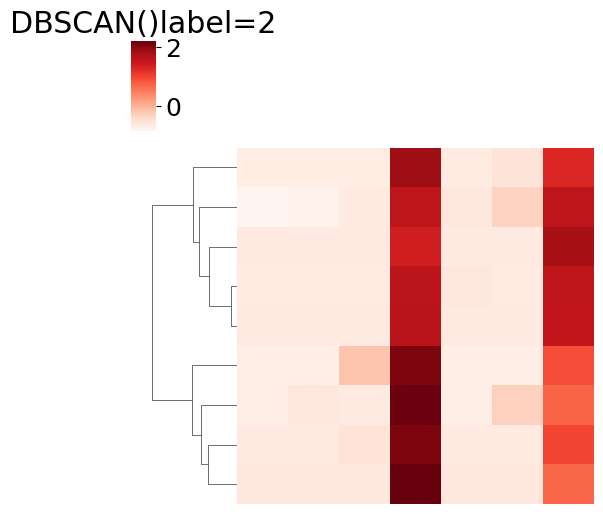

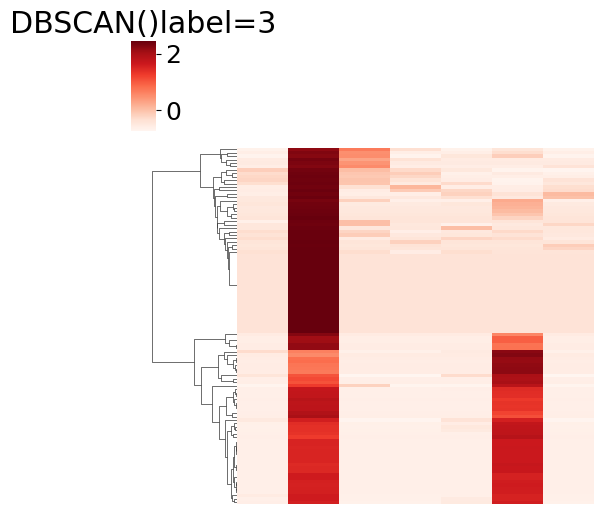

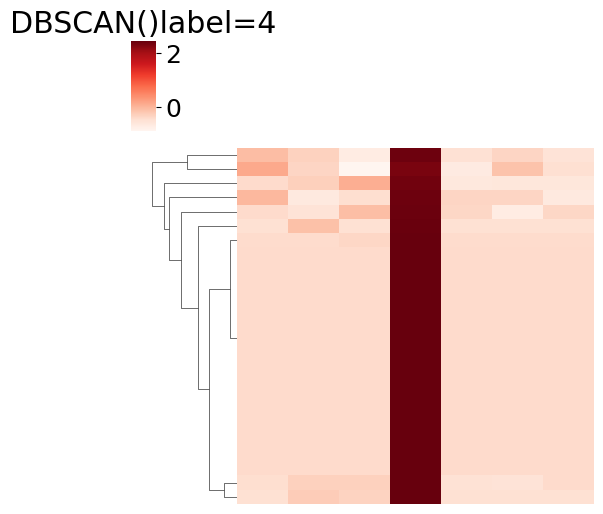

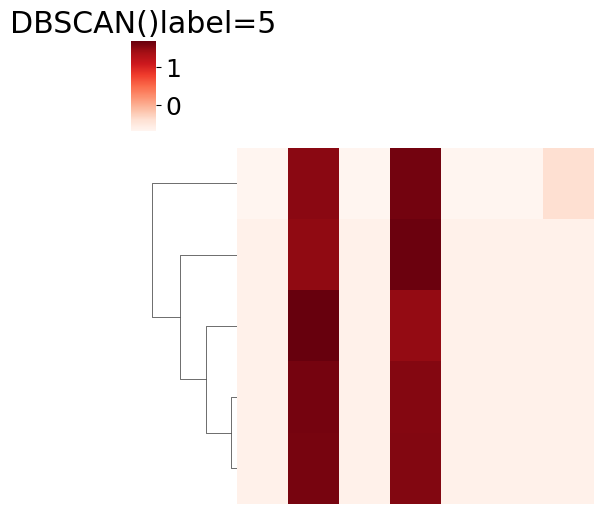

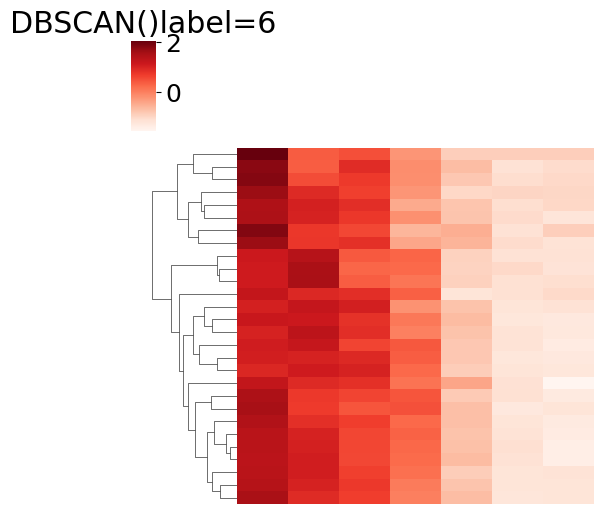

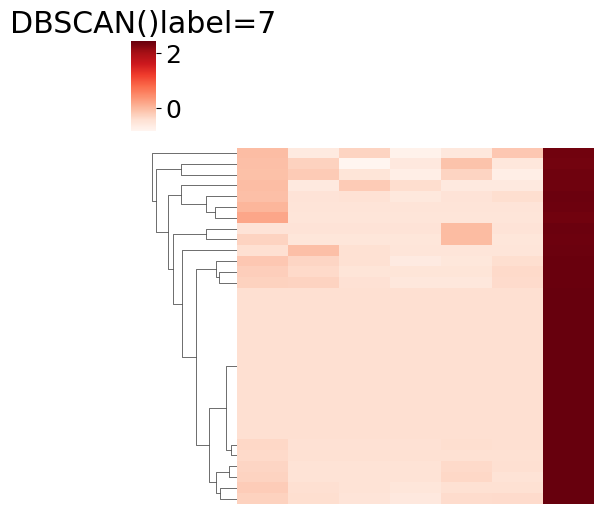

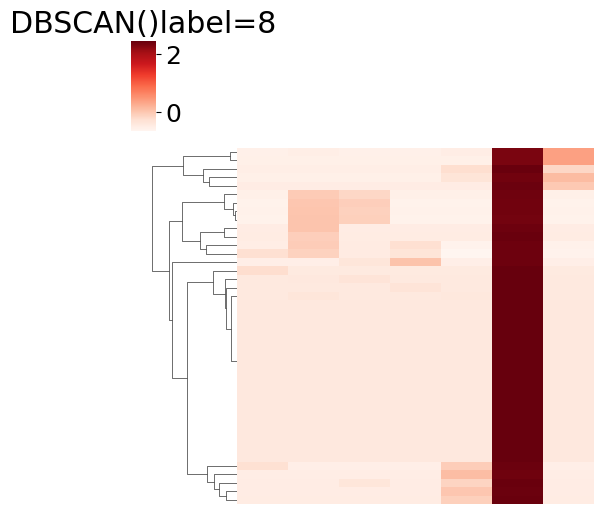

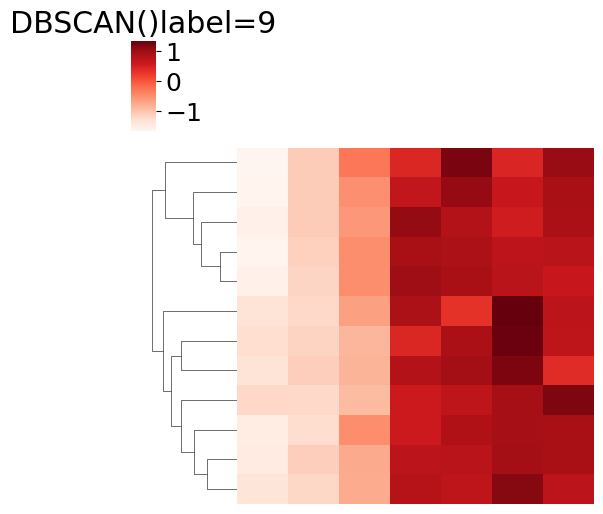

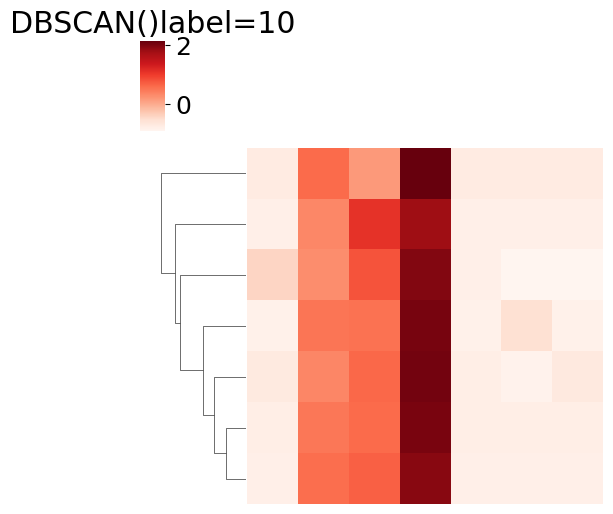

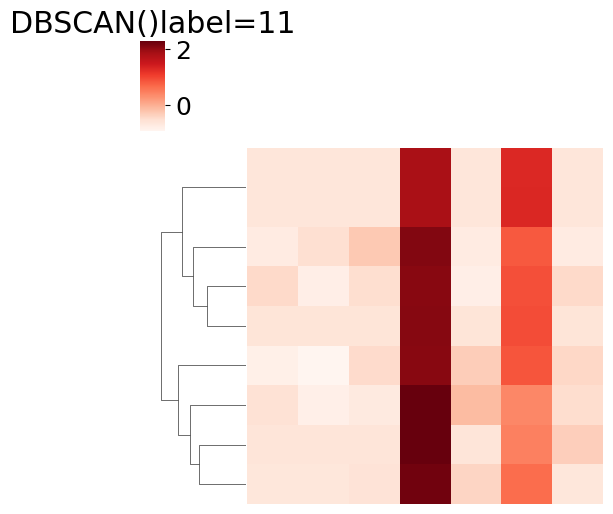

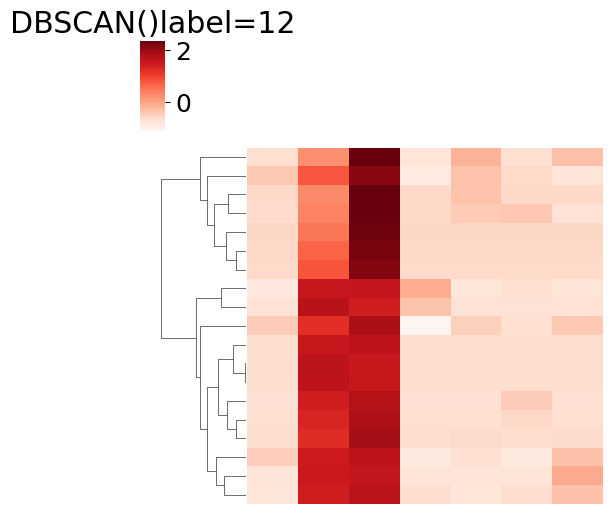

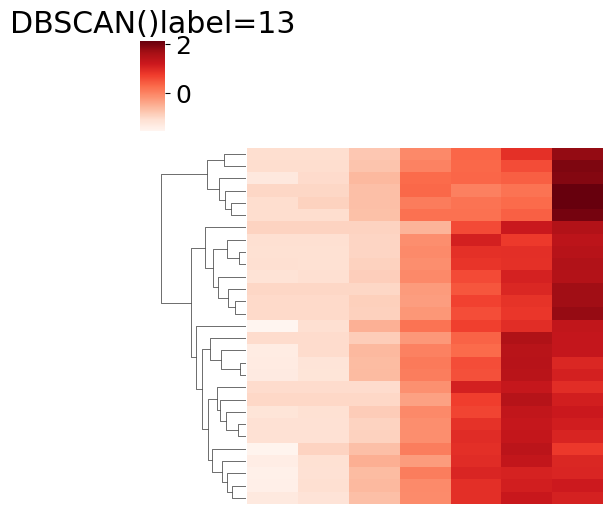

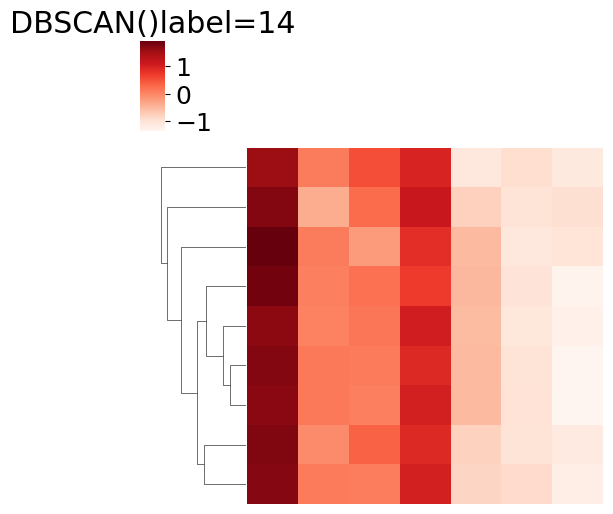

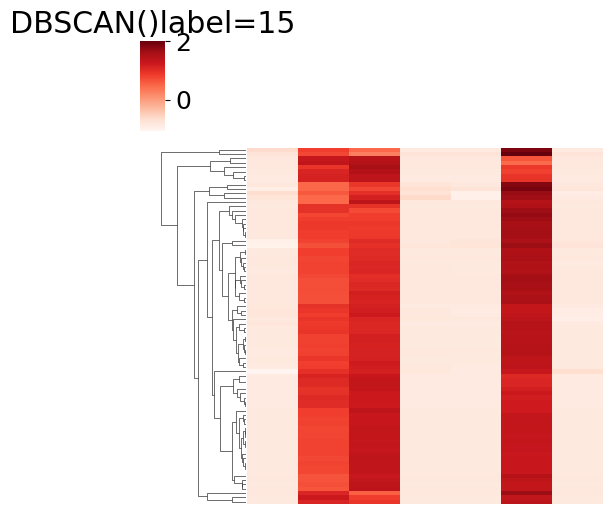

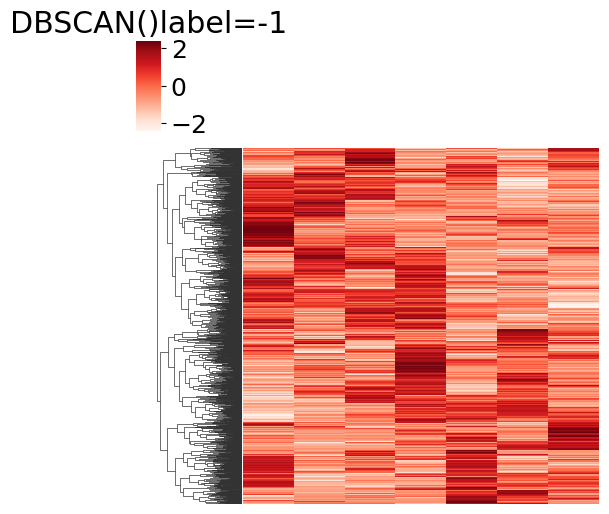

In [15]:
d_label = dm.ms_cluster(d_sample, 
                        select_keyword=['Sample'],
                        normalization='zscore', 
                        visual=True,
                        d_reduce=False,
                        d_reduce_method='tsne',
                        perplexity=20,
                        cluster_method='dbscan', 
                        eps=0.5, 
                        min_samples=5)

## Source apportionment/modeling

100%|███████████████████████████████████████████████████████████████████████████████████| 37/37 [00:11<00:00,  3.32it/s]
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fed4c6b3160>
Traceback (most recent call last):
  File "/home/hack_summer/miniconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/hack_summer/miniconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/hack_summer/miniconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/hack_summer/miniconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no a

data split finished!
modeling finished!
Report starting...
RandomForestRegressor(max_features=5, n_estimators=1000, random_state=10)
The model score for cluster 0 is: 0.993
The model score for cluster 1 is: 0.734
The model score for cluster 2 is: 0.767
The model score is the coefficient of determination.
Report finished!


322.5

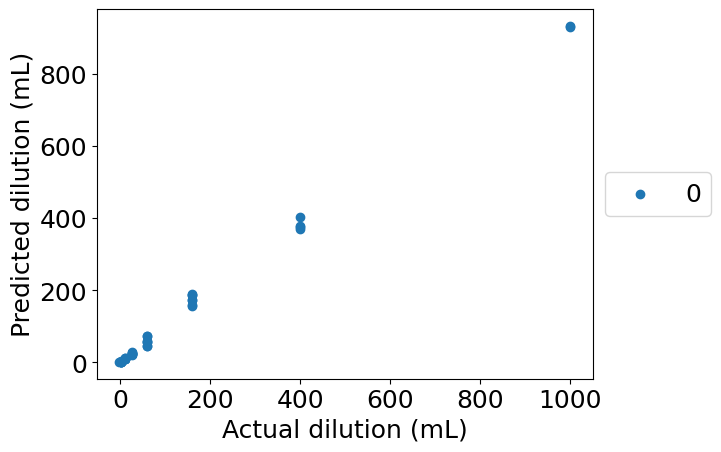

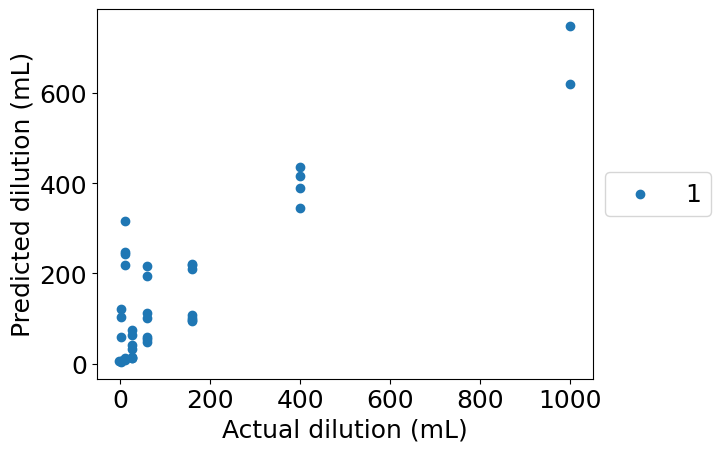

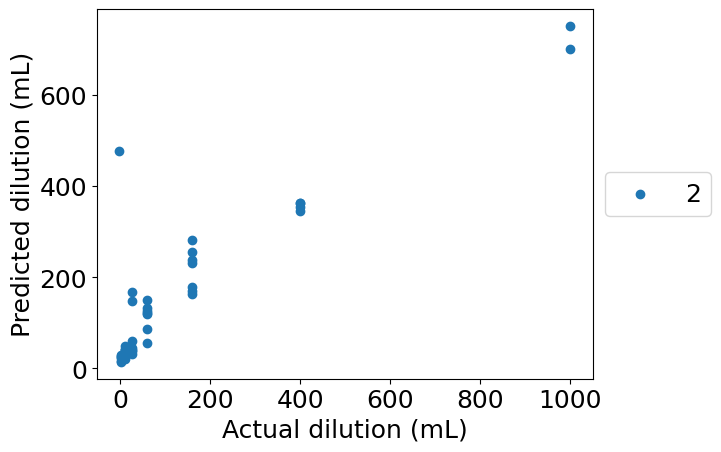

In [16]:
# Data import
d_ms = pd.read_csv('../example_data/dev_data/clustering/sample1114.csv')
d_test = pd.read_csv('../example_data/dev_data/clustering/sample0815.csv')

# Data cleaning 
keys=['solvent','MeOH','ISTD']
d_sample = dm.data_prep(d_ms,keys,rt_range = [2,20], mz_range = [200,800], area_thres=100000)

# Clustering analysis
d_label = dm.ms_cluster(d_sample, ['SR520-Cal'], 'zscore', d_reduce=False, visual=False, cluster_method='dbscan', eps=0.6, min_samples=10)

# Model training
d_model = d_label[d_label['label']!=-1].copy()
d_merge = dm.batch_alignment(d_model,d_test)
dilu_col=['SR520-Cal','SR520_Cal']
d_transpose = dm.transpose(d_merge, dilu_col)
reg = dm.feature_model(d_transpose, cluster_algorithm=True, model_method='ensemble_rf', report=True)

# Prediction on selected new samples based on the model generated above
dm.cluster_pred(reg, d_merge, '20181114_SR520-Creek_Mix1_1', selected_cluster=[0], model_merge='weighted_size')

In [17]:
d_merge[d_merge.label != -1]

Average rt  Average m/z  Average sn  Average score  label  \
0         5.920    200.16484      192.03              1      0   
1         8.211    201.19666       55.48              1      0   
2         4.184    202.08762       55.68              1      0   
3         6.550    202.12363       93.16              1      0   
4         3.981    202.15469       92.02              1      0   
..          ...          ...         ...            ...    ...   
625      13.606    736.48633      125.86              1      0   
626       4.964    754.44305       81.26              1      0   
627      14.924    760.58203       82.79              1      0   
628      15.658    788.60870       81.94              1      0   
629       5.058    798.47003       24.24              1      0   

     20181114_CEC_CAL-8-no4_MSpos_1  20181114_CEC_CAL-8-no4_MSpos_2  \
0                              1751                            1539   
1                                 0                               0   
2                               349                             397   
3                                 0                               0   
4                               341                             603   
..                              ...                             ...   
625                               0                               0   
626                               0                               0   
627                               0                               0   
628                             207                             143   
629                               0                               0   

     20181114_CEC_CAL-8-no4_MSpos_3  20181114_CEC_CAL-8-no4_MSpos_4  \
0                               801                            1317   
1                                 0                               0   
2                               705                             136   
3                                 0                               0   
4                               192                             940   
..                              ...                             ...   
625                               0                               0   
626                               0                               0   
627                               0                               0   
628                              68                             311   
629                               0                               0   

     20181114_CEC_CAL-8-no4_MSpos_5  ...  20180815_SR520_Creek_Mix6A_3  \
0                              1433  ...                          3521   
1                                 0  ...                           224   
2                               667  ...                           876   
3                                 0  ...                            90   
4                               803  ...                           489   
..                              ...  ...                           ...   
625                               0  ...                          1154   
626                               0  ...                          1296   
627                               0  ...                             0   
628                             168  ...                          1163   
629                               0  ...                           369   

     20180815_SR520_Creek_Mix6B_1  20180815_SR520_Creek_Mix6B_2  \
0                            5068                          8101   
1                             320                           153   
2                            1406                          1149   
3                             480                           832   
4                             840                           387   
..                            ...                           ...   
625                          2779                          2142   
626                           292                           987   
627           

In [18]:
dm.cluster_pred(reg, d_merge, '20181114_SR520-Creek_Mix6B_3', selected_cluster=[0], model_merge='weighted_size')/1000

0.008384

## annotation tools

In [46]:
# Formula calculator
msm.mf_calculator(275.2075)

Exact Mass     Formula  Unsat  Mass error (Da)  Mass error (ppm)
0  275.206973  C10H25N7O2    2.0        -0.000527           -1.9147
1  275.208316  C12H27N4O3    1.5         0.000816            2.9641
2  275.205749    C15H33P2    0.5        -0.001751           -6.3613
3  275.205630   C8H23N10O    2.5        -0.001870           -6.7934
4  275.209658   C14H29NO4    1.0         0.002158            7.8428

In [55]:
# Formula annotation
msm.formula_prediction(scans, 299.1765, error=10, mfRange='C0-100H0-200N0-20O0-20P0-50')

Input Mass  Exact Mass  Unsat  Mass error (Da)  Mass error (ppm)  \
Formula                                                                         
C18H23N2O2   299.176399  299.175953    8.5        -0.000446           -1.4917   
C14H26N3O2P  299.176399  299.176264    4.0        -0.000136           -0.4530   
C16H28O3P    299.176399  299.177606    3.5         0.001207            4.0348   
C8H27N7OP2   299.176399  299.175232    0.0        -0.001167           -3.9023   
C3H19N14O3   299.176399  299.176456    1.5         0.000056            0.1881   
CH17N17O2    299.176399  299.175113    2.0        -0.001286           -4.2998   
C12H24N6OP   299.176399  299.174921    4.5        -0.001478           -4.9409   
C16H21N5O    299.176399  299.174610    9.0        -0.001789           -5.9796   
C6H25N10P2   299.176399  299.173889    0.5        -0.002510           -8.3902   
C5H21N11O4   299.176399  299.177798    1.0         0.001399            4.6760   
C6H17N15     299.176399  299.179136    6.0         0.002736            9.1462   
C7H23N8O5    299.176399  299.179141    0.5         0.002742            9.1638   
C10H22N9P    299.176399  299.173578    5.0        -0.002821           -9.4289   

                 score  
Formula                 
C18H23N2O2   94.061136  
C14H26N3O2P  52.431529  
C16H28O3P    50.979676  
C8H27N7OP2   46.998435  
C3H19N14O3   46.187455  
CH17N17O2    42.911267  
C12H24N6OP   40.755437  
C16H21N5O    36.929236  
C6H25N10P2   24.779300  
C5H21N11O4   24.672920  
C6H17N15      0.000000  
C7H23N8O5     0.000000  
C10H22N9P     0.000000

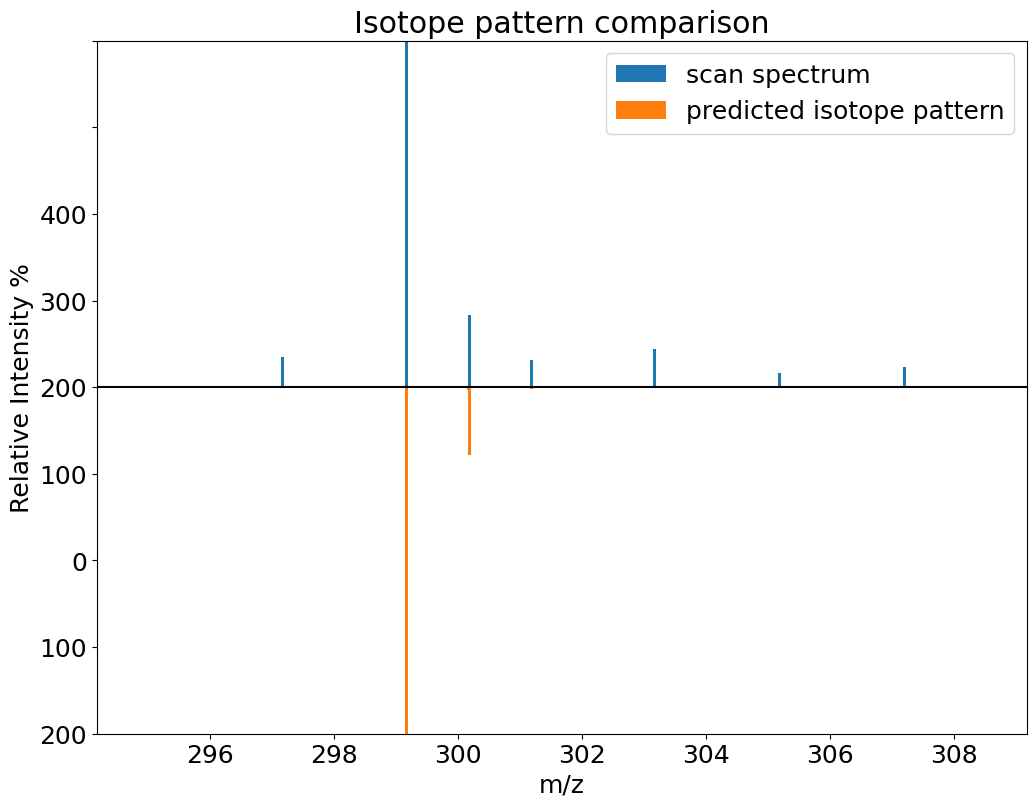

In [21]:
# Isotopic pattern comparison
mvis.iso_plot(scans,299.1765,5,'C18H23N2O2')

# MS2 spectra search and annotation

In [22]:
path = '../../example_mzml/example_ms2.mzML'
scan_frag = msm.get_scans(path, ms_all=True)

Now showing index 1 of 66 total found scans
Precursor: 301.2122 precursor intensity: 119169.9
Scan time: 14.8 minute


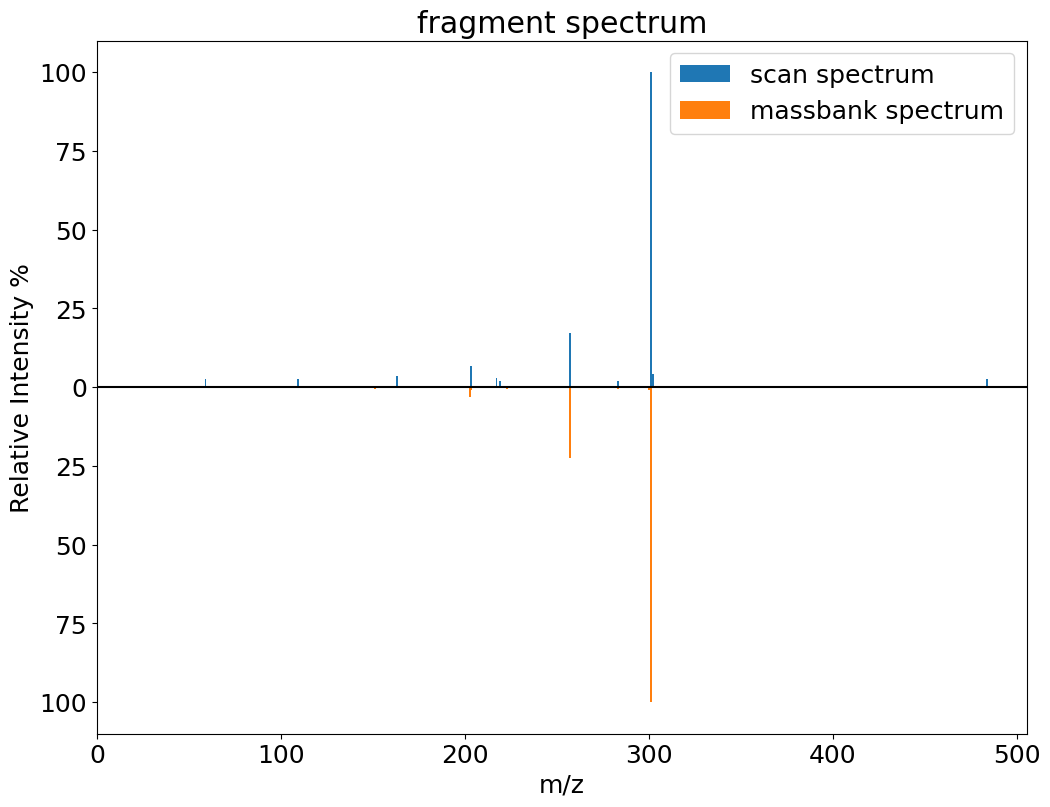

In [23]:
frag.frag_comp(scan_frag, 300, error=5000, scan_index=1, source='MoNA')

In [24]:
# MS2 search
frag.frag_massbank(scan_frag,precursor = 301.2122,error=50)
#lighter version for batch searching/processing

Now showing index 0 of 30 total found scans
